In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, chi2_contingency

# NBA Trends

In this project, I'll analyze data from the NBA (National Basketball Association) and explore possible associations.

This data was originally sourced from 538’s Analysis of the Complete History Of The NBA and contains the original, unmodified data from Basketball Reference as well as several additional variables 538 added to perform their own analysis.

For this project we’ve limited the data to just 5 teams and 10 columns (plus one constructed column, point_diff, the difference between pts and opp_pts).

I will create several charts and tables in this project, so I'll need to use plt.clf() between plots in your code so that the plots don’t layer on top of one another.

Let’s get started!



Let's import the NBA data.

In [45]:
nba = pd.read_csv(r"C:\Users\carlo\Documents\Python Projects\NBA Trends\Codecademy_NBA_Trends_Project\Codecademy_NBA_Trends_Project\nba_games.csv")

In [46]:
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


Subset Data to 2010 Season, 2014 Season

In [47]:
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

nba_2010.head()
nba_2014.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
23468,201310300CLE,2014,Nets,Cavaliers,A,0,94,98,L,0.611981,-4
23469,201310300NYK,2014,Knicks,Bucks,H,0,90,83,W,0.793150,7
23470,201310300SAS,2014,Spurs,Grizzlies,H,0,101,94,W,0.692980,7
23471,201310300TOR,2014,Celtics,Raptors,A,0,87,93,L,0.361233,-6
23472,201310300UTA,2014,Thunder,Jazz,A,0,101,98,W,0.526056,3


Using the pts column from the nba_2010 DataFrame, create two series named knicks_pts_10 (fran_id = "Knicks") and nets_pts_10(fran_id = "Nets") that represent the points each team has scored in their games.

In [48]:
knicks_pt_10 = nba_2010.pts[nba_2010.fran_id == 'Knicks']
nets_pts_10 = nba_2010.pts[nba_2010.fran_id == 'Nets']

print(knicks_pt_10.head())
print(nets_pts_10.head())

21719     93
21725    100
21728    127
21734    117
21739     89
Name: pts, dtype: int64
21720     93
21727     85
21730    104
21733     68
21738     94
Name: pts, dtype: int64


Calculate the difference between the two teams’ average points scored and save the result as diff_means_2010. 

In [49]:
knicks_mean_score_2010 = np.mean(knicks_pt_10)
nets_mean_score_2010 = np.mean(nets_pts_10)
diff_means_2010 = knicks_mean_score_2010 - nets_mean_score_2010
print(diff_means_2010)

9.731707317073173


Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets. 

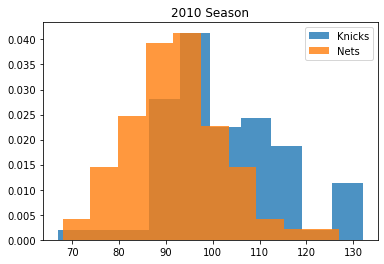

In [50]:
plt.hist(x=knicks_pt_10, alpha=0.8, density=True, label='Knicks')
plt.hist(x=nets_pts_10, alpha=0.8, density=True, label='Nets')
plt.legend()
plt.title('2010 Season')
plt.show()
plt.close()

Now, let’s compare the 2010 games to 2014. Replicate the steps from the previous three exercises using nba_2014.

In [51]:
knicks_pts_14 = nba_2014.pts[nba_2014.fran_id == 'Knicks']
nets_pts_14 = nba_2014.pts[nba_2014.fran_id == 'Nets']
print(knicks_pts_14.head())
print(nets_pts_14.head())


23469     90
23473     81
23480    100
23486     97
23490    101
Name: pts, dtype: int64
23468     94
23475    101
23482     86
23484    104
23494    108
Name: pts, dtype: int64


In [52]:
# Calculating the mean differences for 2014
knicks_mean_score_2014 = np.mean(knicks_pts_14)
nets_mean_score_2014 = np.mean(nets_pts_14)
diff_means_2014 = knicks_mean_score_2014 - nets_mean_score_2014
print(diff_means_2014)

0.44706798131809933


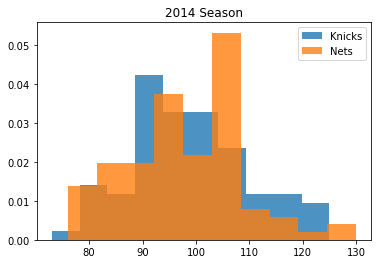

In [53]:
# Create overlapping histogram for 2014
plt.hist(x=knicks_pts_14, alpha=0.8, density = True, label='Knicks')
plt.hist(x=nets_pts_14, alpha=0.8, density = True, label='Nets')
plt.title('2014 Season')
plt.legend()
plt.show()
plt.close()

Using nba_2010, generate side-by-side boxplots with points scored (pts) on the y-axis and team (fran_id) on the x-axis.

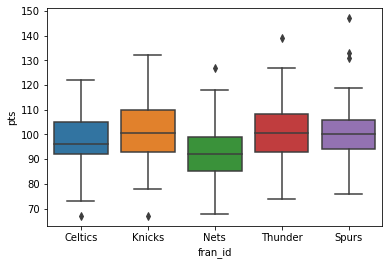

In [54]:
sns.boxplot(data=nba_2010, x='fran_id', y='pts')
plt.show()
plt.close()

We’d like to know if teams tend to win more games at home compared to away.

In [55]:
nba_2010.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
21717,200910270CLE,2010,Celtics,Cavaliers,A,0,95,89,W,0.277472,6
21718,200910280BOS,2010,Celtics,Hornets,H,0,92,59,W,0.814619,33
21719,200910280MIA,2010,Knicks,Heat,A,0,93,115,L,0.258755,-22
21720,200910280MIN,2010,Nets,Timberwolves,A,0,93,95,L,0.475155,-2
21721,200910280OKC,2010,Thunder,Kings,H,0,102,89,W,0.716764,13


Calculate a table of frequencies that shows the counts of game_result and game_location.

In [56]:
game_result = nba_2010.game_result
print(game_result.head())

game_location = nba_2010.game_location
print(game_location.head())

21717    W
21718    W
21719    L
21720    L
21721    W
Name: game_result, dtype: object
21717    A
21718    H
21719    A
21720    A
21721    H
Name: game_location, dtype: object


In [74]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
(location_result_freq)

game_location,A,H
game_result,,
L,133,105
W,92,120


Convert this table of frequencies to a table of proportions and save the result as location_result_proportions.

In [73]:
location_result_proportions = location_result_freq / len(location_result_freq)
(location_result_proportions)

game_location,A,H
game_result,,
L,66.5,52.5
W,46.0,60.0


Using the contingency table we created in Task 6 (use the counts – NOT the proportions), calculate the expected contingency table (if there were no association) and the Chi-Square statistic and print your results.

In [60]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(expected)
print(chi2)

[[119. 119.]
 [106. 106.]]
6.501704455367053


Using nba_2010, calculate the covariance between forecast (538’s projected win probability) and point_diff (the margin of victory/defeat) in the dataset. Call this point_diff_forecast_cov.

In [71]:
point_diff_forecast_cov = np.cov(nba_2010.point_diff, nba_2010.forecast)
print(point_diff_forecast_cov)

[[1.86559287e+02 1.37461257e+00]
 [1.37461257e+00 5.22668307e-02]]


Using nba_2010, calculate the correlation between forecast and point_diff.

In [72]:
point_diff_forecast_corr = pearsonr(nba_2010.point_diff, nba_2010.forecast)
print(point_diff_forecast_corr)

(0.44020887084680815, 9.410391573138826e-23)


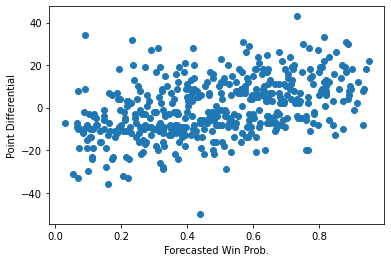

In [70]:
plt.scatter(x='forecast', y='point_diff', data = nba_2010)
plt.xlabel('Forecasted Win Prob.')
plt.ylabel('Point Differential')
plt.show()
plt.close()